In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('kaggle'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


kaggle/.DS_Store
kaggle/digit-recognizer/test.csv
kaggle/digit-recognizer/train.csv
kaggle/digit-recognizer/sample_submission.csv


In [2]:
data = pd.read_csv('kaggle/digit-recognizer/train.csv')


In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [5]:
data = np.array(data)

# m amount of rows (example data points); n amount of columns (features + 1 label )
m, n = data.shape

twenty_five_percent = int(m/100*25)

np.random.seed(6)
np.random.shuffle(data)

data_dev = data[0:twenty_five_percent].T
Y_dev = data_dev[0] # label
X_dev = data_dev[1:n] # features
X_dev = X_dev / 255

data_train = data[twenty_five_percent:m].T
Y_train = data_train[0] # label
X_train = data_train[1:n] # features
X_train = X_train / 255
_, m_train = X_train.shape


In [6]:
def init_params():
    number_of_pixels = 784
    number_of_neurons = 10
    bias_number_of_dimensions = 1
    
    # weights vector with random values between 0 and 1
    W1 = np.random.rand(number_of_neurons, number_of_pixels) - 0.5
    # bias vector (scalar)
    b1 = np.random.rand(number_of_neurons, bias_number_of_dimensions) - 0.5
    
    
    W2 = np.random.rand(number_of_neurons, number_of_neurons) - 0.5
    b2 = np.random.rand(number_of_neurons, bias_number_of_dimensions) - 0.5
    
    return W1, b1, W2, b2

# returns for each value in the vecture
# x if x > 0 else 0
def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def propagate_forward(W1, b1, W2, b2, X):
    
    # dot product = scalar product
    #  the dot product or scalar product is an algebraic operation
    # that takes two equal-length sequences of numbers (usually coordinate vectors)
    # and returns a single number
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)

    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y
    

# The derivative of the relu function is either 0 or 1
def derive_ReLU(Z):
    return Z > 0


def propagate_backwards(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = Y.size
    
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    
    dZ1 = W2.T.dot(dZ2) * derive_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2


    
    
    
    
    
    

In [7]:
def get_predictions (A2):
    return np.argmax(A2, 0)

def get_accuracy (predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size


def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    
    
    for i in range(iterations + 1):
        updated_alpha = alpha - (alpha/10000 * (i + 1))
        Z1, A1, Z2, A2 = propagate_forward(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = propagate_backwards(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, updated_alpha)
        
        if i % 200 == 0:
            print(f"Iteration {i}")
            print(f"Accuracy: {get_accuracy(get_predictions(A2), Y)}")
            print(f"Alpha: {updated_alpha}")
    return W1, b1, W2, b2
        

In [8]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 2000, 1)

Iteration 0
[1 4 1 ... 3 0 1] [5 0 5 ... 3 6 7]
Accuracy: 0.08298412698412698
Alpha: 0.9999
Iteration 200
[5 0 5 ... 3 6 7] [5 0 5 ... 3 6 7]
Accuracy: 0.8907619047619048
Alpha: 0.9799
Iteration 400
[5 0 5 ... 3 6 7] [5 0 5 ... 3 6 7]
Accuracy: 0.9118095238095238
Alpha: 0.9599
Iteration 600
[5 0 5 ... 3 6 7] [5 0 5 ... 3 6 7]
Accuracy: 0.9215873015873016
Alpha: 0.9399
Iteration 800
[5 0 5 ... 3 6 7] [5 0 5 ... 3 6 7]
Accuracy: 0.9273650793650794
Alpha: 0.9198999999999999
Iteration 1000
[5 0 5 ... 3 6 7] [5 0 5 ... 3 6 7]
Accuracy: 0.9313650793650794
Alpha: 0.8999
Iteration 1200
[5 0 5 ... 3 6 7] [5 0 5 ... 3 6 7]
Accuracy: 0.9342539682539682
Alpha: 0.8799
Iteration 1400
[5 0 5 ... 3 6 7] [5 0 5 ... 3 6 7]
Accuracy: 0.9377777777777778
Alpha: 0.8599
Iteration 1600
[5 0 5 ... 3 6 7] [5 0 5 ... 3 6 7]
Accuracy: 0.9405396825396826
Alpha: 0.8399
Iteration 1800
[5 0 5 ... 3 6 7] [5 0 5 ... 3 6 7]
Accuracy: 0.942
Alpha: 0.8199
Iteration 2000
[5 0 5 ... 3 6 7] [5 0 5 ... 3 6 7]
Accuracy: 0.9430

Prediction:  [5]
Label:  5


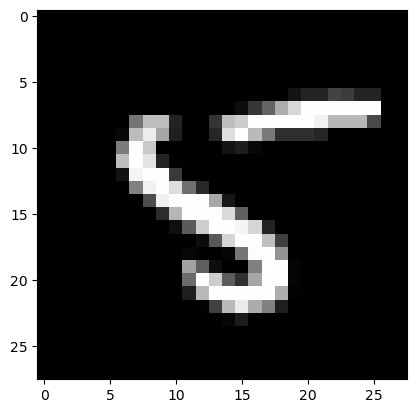

Prediction:  [0]
Label:  0


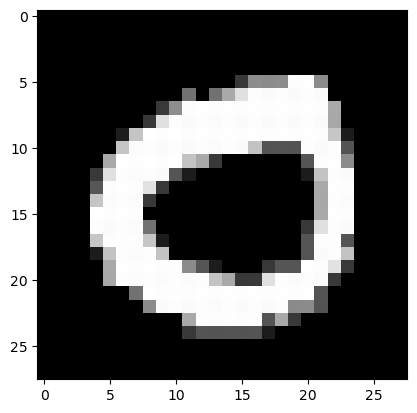

Prediction:  [3]
Label:  5


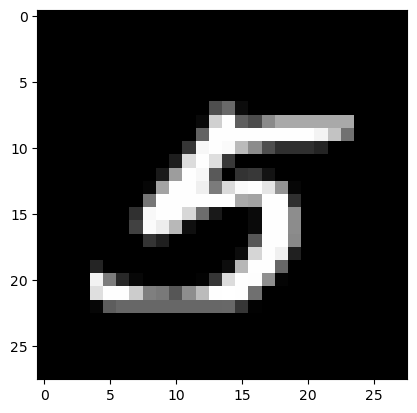

Prediction:  [1]
Label:  1


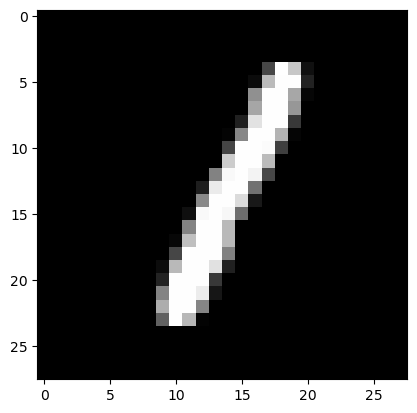

In [9]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = propagate_forward(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()
    
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)




In [10]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[1 9 1 ... 1 4 4] [5 9 1 ... 1 4 4]


0.9265714285714286